## **Problem Statement**

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.


## **Objective**

The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

## **Data Dictionary**

You are provided with 3 files - train.csv, test.csv and sample_submission.csv



--------------------------

### **Training set**

train.csv contains the user and video information along with the engagement score


row_id  - Unique identifier of the row

user_id - Unique identifier of the user

category_id - Category of the video

video_id - Unique identifier of the video

age - Age of the user

gender - Gender of the user (Male and Female)

profession - Profession of the user (Student, Working Professional, Other)

followers - No. of users following a particular category

views - Total views of the videos present in the particular category

engagement_score - Engagement score of the video for a user




----------------------------------------------------

 

### **Test set**

test.csv contains only the user and video information, and you have to predict the engagement score

row_id  - Unique identifier of the row

user_id - Unique identifier of the user

category_id - Category of the video

video_id - Unique identifier of the video

age - Age of the user

gender - Gender of the user (Male and Female)

profession - Profession of the user (Student, Working Professional, Other)

followers - No. of users following a particular category

views - Total views of the videos present in the particular category

 
------------------------------------------------------------------------------


### **Submission File Format**

sample_submission.csv contains only 2 variables - row_id and engagement_score


row_id - Unique identifier of the row

engagement_score - Engagement score of the video for a user

 

In [133]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **TRAINING DATASET**

In [134]:
#Importing Training Set

df=pd.read_csv('train_0OECtn8.csv.xls')
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


### **Statistical analysis of the Dataset**

In [135]:
# Checking shape of Dataset
df.shape

(89197, 10)

In [136]:
# Dataset Description

df.describe(include='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197,89197,89197.000000,89197.000000,89197.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,52397,44638,NaN,NaN,NaN
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,NaN,NaN,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,NaN,NaN,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,NaN,NaN,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,NaN,NaN,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,NaN,NaN,280.000000,714.000000,4.150000


In [137]:
# Total unique values for each attribute

print(df.nunique())

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64


In [138]:
#Checking for Null values in each Feature

df.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

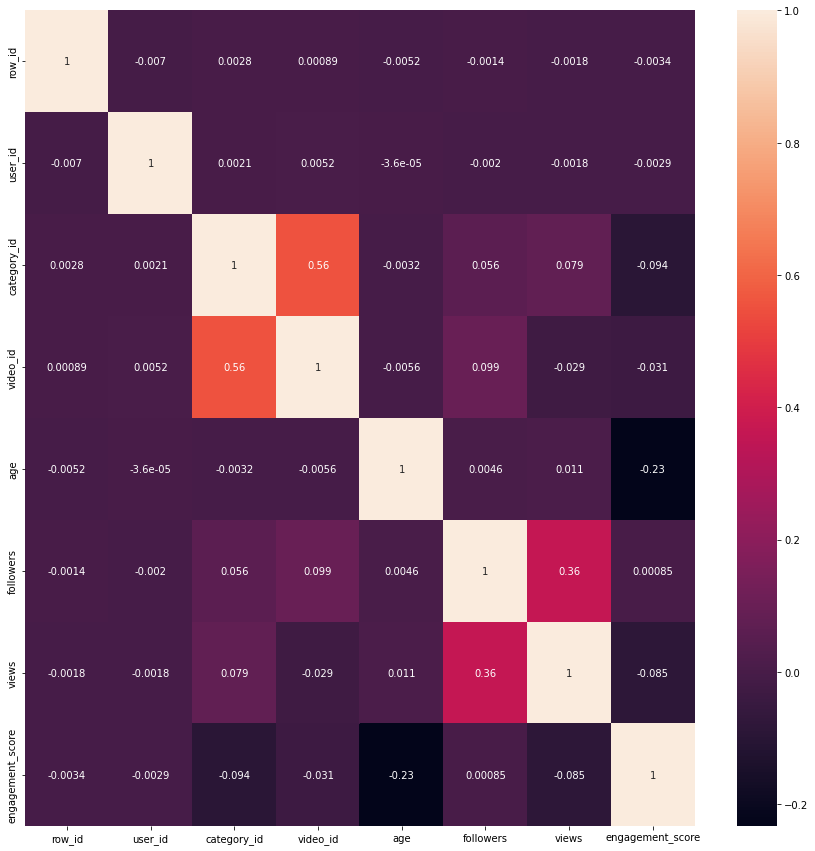

In [139]:
# Plotting Correlation Heatmap to visualize the relation of each feature with the others

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

### **Applying Feature Engineering**

In [140]:
# Classification of Data into Categorical and Continuous Data

#Categorical Data
cat_data = ['gender', 'age', 'profession']

#Continuous Data
con_data = ['followers', 'views']

In [141]:
# Applying Label Encoding on Categorical Data

from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['profession'] = label_encoder.fit_transform(df['profession'])
df['age'] = label_encoder.fit_transform(df['age'])

#Dataframe after applying encoding
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,14,1,1,180,1000,4.33
1,2,5304,32,132,4,0,1,330,714,1.79
2,3,1840,12,24,9,1,1,180,138,4.35
3,4,12597,23,112,9,1,1,220,613,3.77
4,5,13626,23,112,17,1,2,220,613,3.13


In [142]:
# Standardizing Features

'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'profession','followers','views']] = scaler.fit_transform(df[['age','profession', 'followers','views']])

# Dataframe after standardization

df.head()

'''

"\n\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ndf[['age', 'profession','followers','views']] = scaler.fit_transform(df[['age','profession', 'followers','views']])\n\n# Dataframe after standardization\n\ndf.head()\n\n"

### **Feature Selection**

In [143]:
# Defining Independent Features

train = df[cat_data + con_data]
train.head()

,gender,age,profession,followers,views
0,1,14,1,180,1000
1,0,4,1,330,714
2,1,9,1,180,138
3,1,9,1,220,613
4,1,17,2,220,613


In [144]:
# Defining Target Feature

target = df["engagement_score"]
target.head()

0    4.33
1    1.79
2    4.35
3    3.77
4    3.13
Name: engagement_score, dtype: float64

In [145]:
# Using Lazypredict to check the R2 score of each ML model for regressions
# Already checked the R2 score of all the Regressor models using this code cell which showed Gradient Boosting Regressior has maximum R2 Score
# Commented this part as executing this would take huge amount of time.

'''

from lazypredict.Supervised import LazyClassifier

from lazypredict.Supervised import LazyRegressor

from sklearn.utils import shuffle

pip install lazypredict
X, y = shuffle(train, target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

'''

'\n\nfrom lazypredict.Supervised import LazyClassifier\n\nfrom lazypredict.Supervised import LazyRegressor\n\nfrom sklearn.utils import shuffle\n\npip install lazypredict\nX, y = shuffle(train, target, random_state=13)\nX = X.astype(np.float32)\noffset = int(X.shape[0] * 0.9)\nX_train, y_train = X[:offset], y[:offset]\nX_test, y_test = X[offset:], y[offset:]\nreg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\nprint(models)\n\n'

### **Model Creation**
Executing above Code cell would prove that Gradient Boosting Regressor has maimum R2 Score

In [146]:
# importing train_test_split to split the dataset into training set and test set

from sklearn.model_selection import train_test_split

In [147]:
# Breaking dataset into train and test set in the ratio 80:20

train_x, test_x, train_y, test_y = train_test_split(train, target, test_size=0.2,random_state=42)

In [148]:
# Applying Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor
sgbr= GradientBoostingRegressor()
sgbr.fit(train_x,train_y)

GradientBoostingRegressor()

### **Model Testing (R2 and RMSE)**

In [149]:
# Calculating Root Mean Square Error (RMSE) of Gradient Boosting Regressor

preds = sgbr.predict(test_x)
rmse = mean_squared_error(test_y, preds,squared=False)
print(rmse)

0.7057068218676333


In [150]:
# Calculation of R2 Score

from sklearn.model_selection import cross_val_score
print(cross_val_score(sgbr, train, target, cv=30, scoring="r2").mean())

0.33592538243811326


# **TEST DATASET**

### **Output Prediction**

In [151]:
# Importing Test Dataset

df2=pd.read_csv('test_1zqHu22.csv.xls')
df2.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [152]:
# Shape of Test Dataset

df2.shape

(11121, 9)

In [153]:
# Details of Test Dataset

df2.describe(include='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121,11121,11121.000000,11121.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,6377,5572,NaN,NaN
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,NaN,NaN,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,NaN,NaN,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,NaN,NaN,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,NaN,NaN,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,NaN,NaN,270.000000,662.000000


In [154]:
# Checking for Null Values in Test Set Features

df2.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [155]:
# Classification of Data

#Categorical Data
cat_data = ['gender', 'age', 'profession']

#Continuous Data
con_data = ['followers', 'views']

In [156]:
# Applying Label Encoding on Categorical Data

from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

df2['gender'] = label_encoder.fit_transform(df2['gender'])
df2['profession'] = label_encoder.fit_transform(df2['profession'])
df2['age'] = label_encoder.fit_transform(df2['age'])

In [157]:
# Standardizing Features

'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['age', 'profession','followers','views']] = scaler.fit_transform(df2[['age','profession', 'followers','views']])

# Dataframe after Standardization

df.head()

'''

"\n\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ndf2[['age', 'profession','followers','views']] = scaler.fit_transform(df2[['age','profession', 'followers','views']])\n\n# Dataframe after Standardization\n\ndf.head()\n\n"

In [158]:
# Defining Independent Features

train2 = df2[cat_data + con_data]
train2.head()

,gender,age,profession,followers,views
0,1,4,1,180,138
1,1,4,1,230,840
2,0,34,2,280,628
3,1,8,1,270,462
4,0,37,0,230,840


In [159]:
# Performing Predictions on Test set and storing it in pred 

pred=sgbr.predict(train2)
pred

array([4.03656832, 3.80606382, 2.68986206, ..., 3.98305736, 3.69801131,
       3.47346528])

### **Creating Submission File**

In [160]:
# Importing Sample Submission File

sub = pd.read_csv('sample_submission_JPlpRcN.csv.xls')

In [161]:
# Storing row_id in Submission file using Test File

submission = pd.DataFrame(columns=sub.columns)
test_df = pd.read_csv('test_1zqHu22.csv.xls')
submission['row_id'] = test_df['row_id']

In [162]:
# Storing Engagement Score, predicted by model, in Submission File

submission['engagement_score'] = pred
submission.to_csv('submission_automl.csv', index=False)
submission.to_csv('submission.csv', index=False)
submission

,row_id,engagement_score
0,89198,4.036568
1,89199,3.806064
2,89200,2.689862
3,89201,3.975633
4,89202,2.375265
...,...,...
11116,100314,3.971794
11117,100315,3.423834
11118,100316,3.983057
11119,100317,3.698011
